# Plot for presentation

### Usage of edam concept (per subontology) in the bio.tools registry

In [1]:
from rdflib import ConjunctiveGraph
from SPARQLWrapper import SPARQLWrapper, JSON
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd

def remoteQuery(query, endpoint):
    endpoint.setQuery(query)
    try:
        result = endpoint.queryAndConvert()
        pd.set_option("display.max_rows",None,"display.max_colwidth",6000,"display.width",6000,)
        df = pd.DataFrame(result['results']['bindings'])
        df = df.applymap(lambda x: x['value'])
        return df
        #return (result['results']['bindings'])
    except Exception as e:
        print(e)

ep_biotools = SPARQLWrapper("http://localhost:7200/repositories/Project25")
ep_biotools.setReturnFormat(JSON)

## Topic

In [5]:
q_topic_non_obs = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?topic  WHERE {
?topic rdfs:subClassOf* <http://edamontology.org/topic_0003> .
}
"""

q_topic_obs = """ 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT DISTINCT ?topic  WHERE {
    ?topic a owl:Class .
    BIND(strafter(str(?topic), "org/") AS ?id) .
    BIND(strbefore(str(?id), "_") AS ?subset) .
    FILTER(?subset = "topic")
    ?topic owl:deprecated true .
}
"""

q_topic_new = """ 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?topic  WHERE {
?topic rdfs:subClassOf* <http://edamontology.org/topic_0003> .
?topic edam:created_in '1.26'.
}
"""

q_topic_aux = """ 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?topic  WHERE {
?topic rdfs:subClassOf* <http://edamontology.org/topic_0003> .
?topic edam:notRecommendedForAnnotation true.
}
"""

q_topic_bt="""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT DISTINCT ?topic  WHERE {

?tool rdf:type sc:SoftwareApplication ;
   sc:applicationSubCategory ?topic  .
} 
"""

q_topic_obs_bt=""" 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?topic  WHERE {

?tool rdf:type sc:SoftwareApplication ;
   sc:applicationSubCategory ?topic  .
?topic owl:deprecated true . 
}
"""

q_topic_aux_bt=""" 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?topic  WHERE {

?tool rdf:type sc:SoftwareApplication ;
   sc:applicationSubCategory ?topic  .
?topic edam:notRecommendedForAnnotation true.
}
"""

In [6]:
topic_non_obs=remoteQuery(query=q_topic_non_obs, endpoint=ep_biotools)
nb_topic_non_obs=int(len(topic_non_obs))
print(f"a) nb_topic_non_obs: {nb_topic_non_obs}")

topic_obs=remoteQuery(query=q_topic_obs, endpoint=ep_biotools)
nb_topic_obs=int(len(topic_obs))
print(f"b) nb_topic_obs: {nb_topic_obs}")

topic_new=remoteQuery(query=q_topic_new, endpoint=ep_biotools)
nb_topic_new=int(len(topic_new))
print(f"c) nb_topic_new: {nb_topic_new}")

topic_aux=remoteQuery(query=q_topic_aux, endpoint=ep_biotools)
nb_topic_aux=int(len(topic_aux))
print(f"d) nb_topic_aux: {nb_topic_aux}")

topic_bt=remoteQuery(query=q_topic_bt, endpoint=ep_biotools)
nb_topic_bt=int(len(topic_bt))
print(f"e) nb_topic_bt: {nb_topic_bt}")

topic_obs_bt=remoteQuery(query=q_topic_obs_bt, endpoint=ep_biotools)
nb_topic_obs_bt=int(len(topic_obs_bt))
print(f"f) nb_topic_obs_bt: {nb_topic_obs_bt}")

topic_aux_bt=remoteQuery(query=q_topic_aux_bt, endpoint=ep_biotools)
nb_topic_aux_bt=int(len(topic_aux_bt))
print(f"g) nb_topic_aux_bt: {nb_topic_aux_bt}")

nb_topic_valid_bt=nb_topic_bt-nb_topic_obs_bt-nb_topic_aux_bt
nb_topic_aux_not_bt=nb_topic_aux-nb_topic_aux_bt
nb_topic_valid_not_bt=nb_topic_non_obs-nb_topic_new-nb_topic_aux-nb_topic_valid_bt
nb_topic_obs_not_bt=nb_topic_obs-nb_topic_obs_bt

print(f"nb_topic_valid_bt: {nb_topic_valid_bt}")
print(f"nb_topic_aux_not_bt: {nb_topic_aux_not_bt}")
print(f"nb_topic_valid_not_bt: {nb_topic_valid_not_bt}")
print(f"nb_topic_obs_not_bt: {nb_topic_obs_not_bt}")


a) nb_topic_non_obs: 278
b) nb_topic_obs: 188
c) nb_topic_new: 15
d) nb_topic_aux: 1
e) nb_topic_bt: 265
f) nb_topic_obs_bt: 6
g) nb_topic_aux_bt: 1
nb_topic_valid_bt: 258
nb_topic_aux_not_bt: 0
nb_topic_valid_not_bt: 4
nb_topic_obs_not_bt: 182


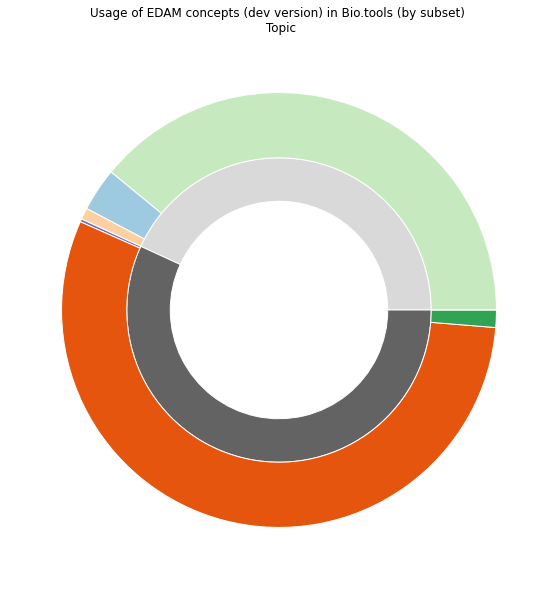

In [9]:
fig, ax = plt.subplots(figsize = (10, 10))
# fig.patch.set_facecolor('xkcd:white')


vals = np.array([[nb_topic_obs_not_bt, nb_topic_new, nb_topic_valid_not_bt, nb_topic_aux_not_bt],
                 [nb_topic_aux_bt, nb_topic_valid_bt, nb_topic_obs_bt,0]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.array([19,16]))
inner_colors = cmap(np.array([11,2,7,14,12,4,8,0]))

# Next commented ligne are to print velues and percentages on diagramm, 

# def func(pct, allvals):
#     absolute = int(pct/100.*np.sum(allvals))
#     return "{:.1f}%\n({:d})".format(pct, absolute)

# ax.pie(vals.sum(axis=1), labels=["Usused","Used"],radius=1-0.3, colors=outer_colors,
#        wedgeprops=dict(width=0.2, edgecolor='w'),autopct=lambda pct: func(pct, vals.sum(axis=1)))

# ax.pie(vals.flatten(), radius=1, colors=inner_colors,
#        wedgeprops=dict(width=0.3, edgecolor='w'),autopct=lambda pct: func(pct, vals.sum(axis=1)))


ax.pie(vals.sum(axis=1),radius=1-0.3, colors=outer_colors,
       wedgeprops=dict(width=0.2, edgecolor='w'))

ax.pie(vals.flatten(), radius=1, colors=inner_colors,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.set(aspect="equal", title='Usage of EDAM concepts (dev version) in Bio.tools (by subset) \n Topic')

plt.show()
fig.savefig("./figures/dev_topic_usage.png")

## Operation

In [18]:
q_operation_non_obs = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?operation  WHERE {
?operation rdfs:subClassOf* <http://edamontology.org/operation_0004> .
}
"""

q_operation_obs = """ 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT DISTINCT ?operation  WHERE {
    ?operation a owl:Class .
    BIND(strafter(str(?operation), "org/") AS ?id) .
    BIND(strbefore(str(?id), "_") AS ?subset) .
    FILTER(?subset = "operation")
    ?operation owl:deprecated true .
}
"""

q_operation_new = """ 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?operation  WHERE {
?operation rdfs:subClassOf* <http://edamontology.org/operation_0004> .
?operation edam:created_in '1.26'.
}
"""

q_operation_aux = """ 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?operation  WHERE {
?operation rdfs:subClassOf* <http://edamontology.org/operation_0004> .
?operation edam:notRecommendedForAnnotation true.
}
"""

q_operation_bt="""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT DISTINCT ?operation  WHERE {

?tool rdf:type sc:SoftwareApplication ;
   sc:featureList ?operation  .
} 
"""

q_operation_obs_bt=""" 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?operation  WHERE {

?tool rdf:type sc:SoftwareApplication ;
   sc:featureList ?operation  .
?operation owl:deprecated true . 
}
"""

q_operation_aux_bt=""" 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?operation  WHERE {

?tool rdf:type sc:SoftwareApplication ;
   sc:featureList ?operation  .
?operation edam:notRecommendedForAnnotation true.
}
"""

In [19]:
operation_non_obs=remoteQuery(query=q_operation_non_obs, endpoint=ep_biotools)
nb_operation_non_obs=int(len(operation_non_obs))
print(f"a) nb_operation_non_obs: {nb_operation_non_obs}")

operation_obs=remoteQuery(query=q_operation_obs, endpoint=ep_biotools)
nb_operation_obs=int(len(operation_obs))
print(f"b) nb_operation_obs: {nb_operation_obs}")

operation_new=remoteQuery(query=q_operation_new, endpoint=ep_biotools)
nb_operation_new=int(len(operation_new))
print(f"c) nb_operation_new: {nb_operation_new}")

operation_aux=remoteQuery(query=q_operation_aux, endpoint=ep_biotools)
nb_operation_aux=int(len(operation_aux))
print(f"d) nb_operation_aux: {nb_operation_aux}")

operation_bt=remoteQuery(query=q_operation_bt, endpoint=ep_biotools)
nb_operation_bt=int(len(operation_bt))
print(f"e) nb_operation_bt: {nb_operation_bt}")

operation_obs_bt=remoteQuery(query=q_operation_obs_bt, endpoint=ep_biotools)
nb_operation_obs_bt=int(len(operation_obs_bt))
print(f"f) nb_operation_obs_bt: {nb_operation_obs_bt}")

operation_aux_bt=remoteQuery(query=q_operation_aux_bt, endpoint=ep_biotools)
nb_operation_aux_bt=int(len(operation_aux_bt))
print(f"g) nb_operation_aux_bt: {nb_operation_aux_bt}")


nb_operation_valid_bt=nb_operation_bt-nb_operation_obs_bt-nb_operation_aux_bt
nb_operation_aux_not_bt=nb_operation_aux-nb_operation_aux_bt
nb_operation_valid_not_bt=nb_operation_non_obs-nb_operation_new-nb_operation_aux-nb_operation_valid_bt
nb_operation_obs_not_bt=nb_operation_obs-nb_operation_obs_bt

print(f"nb_operation_valid_bt: {nb_operation_valid_bt}")
print(f"nb_operation_aux_not_bt: {nb_operation_aux_not_bt}")
print(f"nb_operation_valid_not_bt: {nb_operation_valid_not_bt}")
print(f"nb_operation_obs_not_bt: {nb_operation_obs_not_bt}")

a) nb_operation_non_obs: 538
b) nb_operation_obs: 265
c) nb_operation_new: 4
d) nb_operation_aux: 23
e) nb_operation_bt: 546
f) nb_operation_obs_bt: 20
g) nb_operation_aux_bt: 23
nb_operation_valid_bt: 503
nb_operation_aux_not_bt: 0
nb_operation_valid_not_bt: 8
nb_operation_obs_not_bt: 245


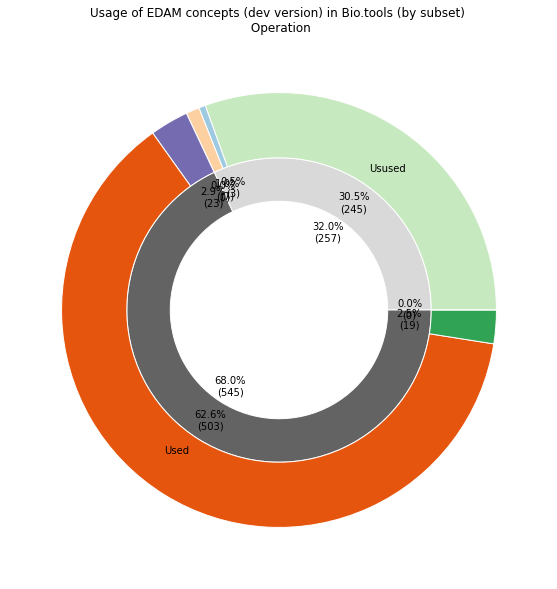

In [29]:
fig, ax = plt.subplots(figsize = (10, 10))
# fig.patch.set_facecolor('xkcd:white')

vals = np.array([[nb_operation_obs_not_bt, nb_operation_new, nb_operation_valid_not_bt, nb_operation_aux_not_bt], [nb_operation_aux_bt, nb_operation_valid_bt, nb_operation_obs_bt,0]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.array([19,16]))
inner_colors = cmap(np.array([11,2,7,14,12,4,8,0]))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# ax.pie(vals.sum(axis=1), labels=["Usused","Used"],radius=1-0.3, colors=outer_colors,
#        wedgeprops=dict(width=0.2, edgecolor='w'),autopct=lambda pct: func(pct, vals.sum(axis=1)))

# ax.pie(vals.flatten(), radius=1, colors=inner_colors,
#        wedgeprops=dict(width=0.3, edgecolor='w'),autopct=lambda pct: func(pct, vals.sum(axis=1)))

ax.pie(vals.sum(axis=1),radius=1-0.3, colors=outer_colors,
       wedgeprops=dict(width=0.2, edgecolor='w'))

ax.pie(vals.flatten(), radius=1, colors=inner_colors,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.set(aspect="equal", title='Usage of EDAM concepts (dev version) in Bio.tools (by subset) \n Operation')
plt.show()
fig.savefig("./figures/dev_operation_usage.png")

## Data

In [21]:
q_data_non_obs = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?data  WHERE {
?data rdfs:subClassOf* <http://edamontology.org/data_0006> .
}
"""

q_data_obs = """ 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT DISTINCT ?data  WHERE {
    ?data a owl:Class .
    BIND(strafter(str(?data), "org/") AS ?id) .
    BIND(strbefore(str(?id), "_") AS ?subset) .
    FILTER(?subset = "data")
    ?data owl:deprecated true .
}
"""

q_data_new = """ 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?data  WHERE {
?data rdfs:subClassOf* <http://edamontology.org/data_0006> .
?data edam:created_in '1.26'.
}
"""

q_data_aux = """ 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?data  WHERE {
?data rdfs:subClassOf* <http://edamontology.org/data_0006> .
?data edam:notRecommendedForAnnotation true.
}
"""

q_data_bt="""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT DISTINCT ?data  WHERE {

    {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   bsc:input [sc:additionalType ?data].        
    } UNION {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   bsc:output [sc:additionalType ?data].        
    }
} 
"""

q_data_obs_bt=""" 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?data  WHERE {

    {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   bsc:input [sc:additionalType ?data].        
    } UNION {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   bsc:output [sc:additionalType ?data].        
    }
?data owl:deprecated true . 
}
"""

q_data_aux_bt=""" 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?data  WHERE {

    {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   bsc:input [sc:additionalType ?data].        
    } UNION {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   bsc:output [sc:additionalType ?data].        
    }
?data edam:notRecommendedForAnnotation true.
}
"""

In [22]:
data_non_obs=remoteQuery(query=q_data_non_obs, endpoint=ep_biotools)
nb_data_non_obs=int(len(data_non_obs))
print(f"a) nb_data_non_obs: {nb_data_non_obs}")

data_obs=remoteQuery(query=q_data_obs, endpoint=ep_biotools)
nb_data_obs=int(len(data_obs))
print(f"b) nb_data_obs: {nb_data_obs}")

data_new=remoteQuery(query=q_data_new, endpoint=ep_biotools)
nb_data_new=int(len(data_new))
print(f"c) nb_data_new: {nb_data_new}")

data_aux=remoteQuery(query=q_data_aux, endpoint=ep_biotools)
nb_data_aux=int(len(data_aux))
print(f"d) nb_data_aux: {nb_data_aux}")

data_bt=remoteQuery(query=q_data_bt, endpoint=ep_biotools)
nb_data_bt=int(len(data_bt))
print(f"e) nb_data_bt: {nb_data_bt}")

data_obs_bt=remoteQuery(query=q_data_obs_bt, endpoint=ep_biotools)
nb_data_obs_bt=int(len(data_obs_bt))
print(f"f) nb_data_obs_bt: {nb_data_obs_bt}")

data_aux_bt=remoteQuery(query=q_data_aux_bt, endpoint=ep_biotools)
nb_data_aux_bt=int(len(data_aux_bt))
print(f"g) nb_data_aux_bt: {nb_data_aux_bt}")

nb_data_valid_bt=nb_data_bt-nb_data_obs_bt-nb_data_aux_bt
nb_data_aux_not_bt=nb_data_aux-nb_data_aux_bt
nb_data_valid_not_bt=nb_data_non_obs-nb_data_new-nb_data_aux-nb_data_valid_bt
nb_data_obs_not_bt=nb_data_obs-nb_data_obs_bt

print(f"nb_data_valid_bt: {nb_data_valid_bt}")
print(f"nb_data_aux_not_bt: {nb_data_aux_not_bt}")
print(f"nb_data_valid_not_bt: {nb_data_valid_not_bt}")
print(f"nb_data_obs_not_bt: {nb_data_obs_not_bt}")

print(nb_data_non_obs+nb_data_obs)

a) nb_data_non_obs: 948
b) nb_data_obs: 546
c) nb_data_new: 1
d) nb_data_aux: 117
e) nb_data_bt: 559
f) nb_data_obs_bt: 18
g) nb_data_aux_bt: 54
nb_data_valid_bt: 487
nb_data_aux_not_bt: 63
nb_data_valid_not_bt: 343
nb_data_obs_not_bt: 528
1494


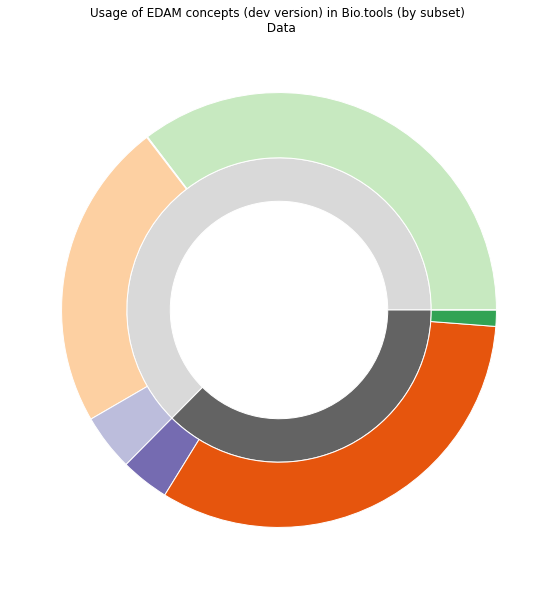

In [23]:
fig, ax = plt.subplots(figsize = (10, 10))
# fig.patch.set_facecolor('xkcd:white')


vals = np.array([[nb_data_obs_not_bt, nb_data_new, nb_data_valid_not_bt, nb_data_aux_not_bt], [nb_data_aux_bt, nb_data_valid_bt, nb_data_obs_bt,0]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.array([19,16]))
inner_colors = cmap(np.array([11,2,7,14,12,4,8,0]))

ax.pie(vals.sum(axis=1),radius=1-0.3, colors=outer_colors,
       wedgeprops=dict(width=0.2, edgecolor='w'))

ax.pie(vals.flatten(), radius=1, colors=inner_colors,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.set(aspect="equal", title='Usage of EDAM concepts (dev version) in Bio.tools (by subset) \n Data')
plt.show()
fig.savefig("./figures/dev_data_usage.png")

## Format

In [2]:
q_format_non_obs = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?format  WHERE {
?format rdfs:subClassOf* <http://edamontology.org/format_1915> .
}
"""

q_format_obs = """ 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT DISTINCT ?format  WHERE {
    ?format a owl:Class .
    BIND(strafter(str(?format), "org/") AS ?id) .
    BIND(strbefore(str(?id), "_") AS ?subset) .
    FILTER(?subset = "format")
    ?format owl:deprecated true .
}
"""

q_format_new = """ 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?format  WHERE {
?format rdfs:subClassOf* <http://edamontology.org/format_1915> .
?format edam:created_in '1.26'.
}
"""

q_format_aux = """ 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?format  WHERE {
?format rdfs:subClassOf* <http://edamontology.org/format_1915> .
?format edam:notRecommendedForAnnotation true.
}
"""

q_format_bt="""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT DISTINCT ?format  WHERE {

    {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   bsc:input [sc:encodingFormat ?format].        
    } UNION {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   bsc:output [sc:encodingFormat ?format].        
    }
} 
"""

q_format_obs_bt=""" 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?format  WHERE {

    {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   bsc:input [sc:encodingFormat ?format].        
    } UNION {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   bsc:output [sc:encodingFormat ?format].        
    }
?format owl:deprecated true . 
}
"""

q_format_aux_bt=""" 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sc: <http://schema.org/>
PREFIX bsc: <http://bioschemas.org/>
PREFIX edam: <http://edamontology.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>


SELECT DISTINCT ?format  WHERE {

    {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   bsc:input [sc:encodingFormat ?format].        
    } UNION {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   bsc:output [sc:encodingFormat ?format].        
    }
?format edam:notRecommendedForAnnotation true.
}
"""

In [3]:
format_non_obs=remoteQuery(query=q_format_non_obs, endpoint=ep_biotools)
nb_format_non_obs=int(len(format_non_obs))
print(f"a) nb_format_non_obs: {nb_format_non_obs}")

format_obs=remoteQuery(query=q_format_obs, endpoint=ep_biotools)
nb_format_obs=int(len(format_obs))
print(f"b) nb_format_obs: {nb_format_obs}")

format_new=remoteQuery(query=q_format_new, endpoint=ep_biotools)
nb_format_new=int(len(format_new))
print(f"c) nb_format_new: {nb_format_new}")

format_aux=remoteQuery(query=q_format_aux, endpoint=ep_biotools)
nb_format_aux=int(len(format_aux))
print(f"d) nb_format_aux: {nb_format_aux}")

format_bt=remoteQuery(query=q_format_bt, endpoint=ep_biotools)
nb_format_bt=int(len(format_bt))
print(f"e) nb_format_bt: {nb_format_bt}")

format_obs_bt=remoteQuery(query=q_format_obs_bt, endpoint=ep_biotools)
nb_format_obs_bt=int(len(format_obs_bt))
print(f"f) nb_format_obs_bt: {nb_format_obs_bt}")

format_aux_bt=remoteQuery(query=q_format_aux_bt, endpoint=ep_biotools)
nb_format_aux_bt=int(len(format_aux_bt))
print(f"g) nb_format_aux_bt: {nb_format_aux_bt}")

nb_format_valid_bt=nb_format_bt-nb_format_obs_bt-nb_format_aux_bt
nb_format_aux_not_bt=nb_format_aux-nb_format_aux_bt
nb_format_valid_not_bt=nb_format_non_obs-nb_format_new-nb_format_aux-nb_format_valid_bt
nb_format_obs_not_bt=nb_format_obs-nb_format_obs_bt

print(f"nb_format_valid_bt: {nb_format_valid_bt}")
print(f"nb_format_aux_not_bt: {nb_format_aux_not_bt}")
print(f"nb_format_valid_not_bt: {nb_format_valid_not_bt}")
print(f"nb_format_obs_not_bt: {nb_format_obs_not_bt}")

a) nb_format_non_obs: 619
b) nb_format_obs: 117
c) nb_format_new: 8
d) nb_format_aux: 64
e) nb_format_bt: 254
f) nb_format_obs_bt: 0
g) nb_format_aux_bt: 40
nb_format_valid_bt: 214
nb_format_aux_not_bt: 24
nb_format_valid_not_bt: 333
nb_format_obs_not_bt: 117


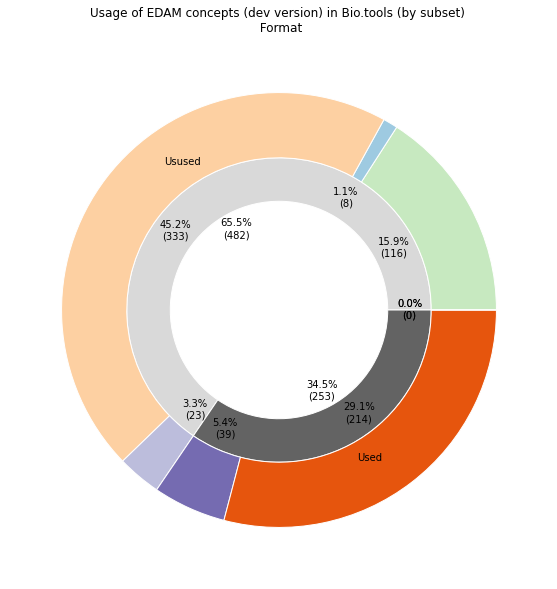

In [8]:
fig, ax = plt.subplots(figsize = (10, 10))
# fig.patch.set_facecolor('xkcd:white')


vals = np.array([[nb_format_obs_not_bt, nb_format_new, nb_format_valid_not_bt, nb_format_aux_not_bt], [nb_format_aux_bt, nb_format_valid_bt, nb_format_obs_bt,0]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.array([19,16]))
inner_colors = cmap(np.array([11,2,7,14,12,4,8,0]))


# ax.pie(vals.sum(axis=1), labels=["Usused","Used"],radius=1-0.3, colors=outer_colors,
#        wedgeprops=dict(width=0.2, edgecolor='w'),autopct=lambda pct: func(pct, vals.sum(axis=1)))

# ax.pie(vals.flatten(), radius=1, colors=inner_colors,
#        wedgeprops=dict(width=0.3, edgecolor='w'),autopct=lambda pct: func(pct, vals.sum(axis=1)))

ax.pie(vals.sum(axis=1),radius=1-0.3, colors=outer_colors,
       wedgeprops=dict(width=0.2, edgecolor='w'))

ax.pie(vals.flatten(), radius=1, colors=inner_colors,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.set(aspect="equal", title='Usage of EDAM concepts (dev version) in Bio.tools (by subset) \n Format')
plt.show()
fig.savefig("./figures/dev_format_usage.png")

In [46]:
import plotly.express as px

vals = np.array([[nb_format_obs_not_bt, nb_format_new, nb_format_valid_not_bt, nb_format_aux_not_bt], [nb_format_aux_bt, nb_format_valid_bt, nb_format_obs_bt,0]])
sum=vals.sum(axis=1)

data = dict(
    categories = ['EDAM', 'Unused', 'Used',
                  'A1', 'A2', 'A3', 'A4',
                  'B1', 'B2', 'B3'],
    parent = ['',   'EDAM', 'EDAM',
                    'Unused', 'Unused','Unused', 'Unused',
                    'Used', 'Used', 'Used'],
    value = [vals.sum(),   sum[0],sum[1],
                    nb_format_obs_not_bt, nb_format_new, nb_format_valid_not_bt, nb_format_aux_not_bt,
                    nb_format_aux_bt, nb_format_valid_bt, nb_format_obs_bt]
            )

fig = px.sunburst(data,
                  names = 'categories',
                  parents = 'parent',
                  values = 'value',
                  branchvalues = 'total')
    
fig.show() 
 


In [36]:
vals[1]

array([ 40, 214,   0,   0])

In [43]:
print(a=vals[0].append(vals[1]))

TypeError: 'a' is an invalid keyword argument for print()